In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

books = pd.read_csv("bestsellers_with_categories.csv")


Wyświetl pierwsze pięć wierszy (użyj funkcji head)

In [2]:
print("Pierwsze pięć wierszy:")
print(books.head)

Pierwsze pięć wierszy:
<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2         

Wyświetl wymiary zbioru danych (użyj atrybutu shape)

In [3]:
print(books.shape)

(550, 7)


O ilu książkach przechowywane są dane w zbiorze danych?

In [4]:
print(f"Zbiór danych przechowuje informacje o {books.shape[0]} ksiazkach.")

Zbiór danych przechowuje informacje o 550 ksiazkach.


Zmiana nazw kolumn:

In [5]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(books)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

## Pierwotne badanie danych

Sprawdź, czy wszystkie wiersze zawierają wystarczającą ilość danych: wypisz liczbę pustych miejsc (na) w każdej kolumnie (użyj funkcji isna i sum).

In [6]:
books_count_na = books.isna().sum()
print(books_count_na)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Czy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Nie

Sprawdź unikalne wartości w kolumnie genre (użyj funkcji unique).

In [7]:
books_genre_unique = books["genre"].unique()
print(books_genre_unique)

['Non Fiction' 'Fiction']


Jakie są unikalne gatunki? Odpowiedź: 'Non Fiction' i 'Fiction'

Teraz spójrz na rozkład cen: zbuduj wykres (użyj kind='hist')

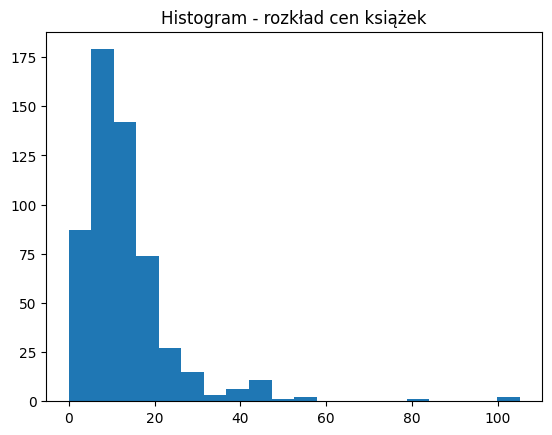

In [8]:
plt.hist(books["price"], bins=20)
plt.title("Histogram - rozkład cen książek")
plt.show()

Określ maksymalną, minimalną, średnią i medianową cenę (użyj funkcji max, min, mean, median).

In [9]:
print("Cena maksymalna to: ", books["price"].max())
print("Cena minimalna to: ", books["price"].min())
print("Średnia to: ", books["price"].mean())
print("Mediana to: ", books["price"].median())

Cena maksymalna to:  105
Cena minimalna to:  0
Średnia to:  13.1
Mediana to:  11.0


## Wyszukiwanie i sortowanie danych

In [10]:
print("Jaka jest najwyższa ocena w zbiorze danych?")
max_price = books["user_rating"].max()
print("Odpowiedź: Najwyższa ocena w zbiorze danych to: ", max_price)

Jaka jest najwyższa ocena w zbiorze danych?
Odpowiedź: Najwyższa ocena w zbiorze danych to:  4.9


In [11]:
print("\nIle książek ma taką ocenę?")
max_price = books["user_rating"].max()
count_books_max_price = books[books["user_rating"] == max_price].shape[0]
print(f"Odpowiedź: {count_books_max_price} książek ma taką ocenę.")


Ile książek ma taką ocenę?
Odpowiedź: 52 książek ma taką ocenę.


In [12]:
print("\nKtóra książka ma najwięcej wyświetleń?")
max_reviews = books["reviews"].max()
book_max_reviews = books[books["reviews"] == max_reviews]["name"]
print("Odpowiedź: Najwięcej wyświetleń ma ksiażka: ", book_max_reviews)


Która książka ma najwięcej wyświetleń?
Odpowiedź: Najwięcej wyświetleń ma ksiażka:  534    Where the Crawdads Sing
Name: name, dtype: object


In [13]:
print("\nKtóra z książek z Top 50 w 2015 roku jest najdroższa?")
books_2015 = books[books["year"] == 2015]
books_2015_top50 = books_2015.nlargest(50, "user_rating")
books_2015_top50_max_price = books_2015_top50.loc[books_2015_top50["price"].idxmax()]
print(books_2015_top50_max_price)


Która z książek z Top 50 w 2015 roku jest najdroższa?
name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


In [14]:
print("Ile książek z gatunku Fiction znalazło się w Top 50 w 2010 roku")
books_2010_non_fiction = books[(books["year"] == 2010) & (books["genre"] == "Fiction")]
books_2010_non_fiction_top50 = books_2010_non_fiction.nlargest(50, "user_rating").shape[0]
print(f"Odpowiedź: W top 50 znalazło się {books_2010_non_fiction_top50} książek z 2010 i gatunku Fiction.")

Ile książek z gatunku Fiction znalazło się w Top 50 w 2010 roku
Odpowiedź: W top 50 znalazło się 20 książek z 2010 i gatunku Fiction.


In [15]:
print("Ile książek z oceną 4,9 znalazło się w rankingu w 2010 i 2011 roku?")
books_user_rating = books[books["user_rating"] == 4.9]

books_2010_top50 = (books[books["year"] == 2010]).nlargest(50, "user_rating")
books_2011_top50 = (books[books["year"] == 2011]).nlargest(50, "user_rating")
books_user_rating_in_books_2010_top50 = books_2010_top50["user_rating"].isin([4.9])
books_user_rating_in_books_2011_top50 = books_2011_top50["user_rating"].isin([4.9])
count_books_user_rating_in_books_2010_top50 = books_2010_top50[books_user_rating_in_books_2010_top50].shape[0]
count_books_user_rating_in_books_2011_top50 = books_2011_top50[books_user_rating_in_books_2011_top50].shape[0]
total = count_books_user_rating_in_books_2010_top50 + count_books_user_rating_in_books_2011_top50
print(f"Odpowiedź: {total} książka/książek.")


Ile książek z oceną 4,9 znalazło się w rankingu w 2010 i 2011 roku?
Odpowiedź: 1 książka/książek.


In [16]:
print("I na koniec posortujmy rosnąco według ceny wszystkie książki, które znalazły się w rankingu w 2015 roku i kosztowały mniej niż 8 dolarów")
books_2015_less8dolar_top50 = (books[(books["year"] == 2015) & (books["price"] < 8)]).nlargest(50, "user_rating").sort_values("price")
print(books_2015_less8dolar_top50)

I na koniec posortujmy rosnąco według ceny wszystkie książki, które znalazły się w rankingu w 2015 roku i kosztowały mniej niż 8 dolarów
                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
28                        Baby Touch and Feel: Animals                  DK   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
55   

In [17]:
print("Która książka jest ostatnia na posortowanej liście?")
books_2015_less8dolar_top50 = (books[(books["year"] == 2015) & (books["price"] < 8)]).nlargest(50, "user_rating").sort_values("price")
books_2015_less8dolar_top50_last = books_2015_less8dolar_top50.tail(1)["name"].values[0]
print(f"Odpowiedź: Ostatnia książka na posortowanej liście to: {books_2015_less8dolar_top50_last}")

Która książka jest ostatnia na posortowanej liście?
Odpowiedź: Ostatnia książka na posortowanej liście to: Old School (Diary of a Wimpy Kid #10)


## Agregacja danych i łączenie tabel

In [18]:
books_grouped_by_genre_stats = books.groupby("genre")["price"].agg(["min", "max"]).reset_index()
print(books_grouped_by_genre_stats)

books_max_price_fiction = books_grouped_by_genre_stats[books_grouped_by_genre_stats["genre"] == "Fiction"]["max"].values[0]
print(f"\nMaksymalna cena dla gatunku Fiction: {books_max_price_fiction}")

books_min_price_fiction = books_grouped_by_genre_stats[books_grouped_by_genre_stats["genre"] == "Fiction"]["min"].values[0]
print(f"Maksymalna cena dla gatunku Fiction: {books_min_price_fiction}")

books_max_price_non_fiction = books_grouped_by_genre_stats[books_grouped_by_genre_stats["genre"] == "Non Fiction"]["max"].values[0]
print(f"\nMaksymalna cena dla gatunku Non Fiction: {books_max_price_non_fiction}")

books_min_price_non_fiction = books_grouped_by_genre_stats[books_grouped_by_genre_stats["genre"] == "Non Fiction"]["min"].values[0]
print(f"Maksymalna cena dla gatunku Non Fiction: {books_min_price_non_fiction}")



         genre  min  max
0      Fiction    0   82
1  Non Fiction    0  105

Maksymalna cena dla gatunku Fiction: 82
Maksymalna cena dla gatunku Fiction: 0

Maksymalna cena dla gatunku Non Fiction: 105
Maksymalna cena dla gatunku Non Fiction: 0


In [19]:
count_books_groupped_by_author = books.groupby("author")["name"].agg("count").reset_index().rename(columns={"name": "book_count"})

print(f"Wymiar tabeli to: {count_books_groupped_by_author.shape}")

max_number_of_books = count_books_groupped_by_author["book_count"].max()
has_max_number_of_books = count_books_groupped_by_author[count_books_groupped_by_author["book_count"] == max_number_of_books]["author"].values[0]
print(f"\nNajwięcej książek ma autor: {has_max_number_of_books}")

print(f"\n{has_max_number_of_books} ma {max_number_of_books} książek.")

Wymiar tabeli to: (248, 2)

Najwięcej książek ma autor: Jeff Kinney

Jeff Kinney ma 12 książek.


In [20]:
avg_ratings_books_groupped_by_author = books.groupby("author")["user_rating"].agg("mean").reset_index().rename(columns={"user_rating": "avg_user_rating"})
print(f"Wymiar tabeli to: {avg_ratings_books_groupped_by_author.shape}")
min_avg_rating = avg_ratings_books_groupped_by_author["avg_user_rating"].agg("min")
min_avg_rating_books = avg_ratings_books_groupped_by_author[avg_ratings_books_groupped_by_author["avg_user_rating"] == min_avg_rating]
min_avg_rating_books_author = min_avg_rating_books["author"].values[0]
print(f"\n{min_avg_rating_books_author} ma najniższą średnią, która wynosi: {min_avg_rating}.")

Wymiar tabeli to: (248, 2)

Donna Tartt ma najniższą średnią, która wynosi: 3.9.


In [21]:
count_books_groupped_by_author = books.groupby("author")["name"].agg("count")
avg_ratings_books_groupped_by_author = books.groupby("author")["user_rating"].agg("mean")

authors_count_avg = pd.concat([count_books_groupped_by_author, avg_ratings_books_groupped_by_author], axis=1).reset_index().rename(columns={"name":"book_count", "user_rating":"avg_user_rating"})
authors_count_avg_sorted_book_count = authors_count_avg.sort_values("book_count")
authors_count_avg_sorted_avg_user_rating = authors_count_avg.sort_values("avg_user_rating")
print("Książki posortowane wg liczby książek, rosnąco:\n")
print(authors_count_avg_sorted_book_count)
first_authors_count_avg_sorted_book_count = authors_count_avg_sorted_book_count.head(1)["author"].values[0]
print(f"\nPierwszy(a) na liście jest: {first_authors_count_avg_sorted_book_count}.")
print("\nKsiążki posortowane wg średniej oceny, rosnąco:\n")
print(authors_count_avg_sorted_avg_user_rating)
first_authors_count_avg_sorted_avg_user_rating = authors_count_avg_sorted_avg_user_rating.head(1)["author"].values[0]
print(f"\nPierwszy(a) na liście jest: {first_authors_count_avg_sorted_avg_user_rating}.")

Książki posortowane wg liczby książek, rosnąco:

                                 author  book_count  avg_user_rating
123                          Jill Twiss           1         4.900000
178                      Patrick Thorpe           1         4.900000
109                   Ian K. Smith M.D.           1         4.100000
108                        Howard Stern           1         4.300000
107                     Hopscotch Girls           1         4.800000
..                                  ...         ...              ...
11   American Psychological Association          10         4.500000
226                     Suzanne Collins          11         4.663636
92                         Gary Chapman          11         4.736364
197                        Rick Riordan          11         4.772727
120                         Jeff Kinney          12         4.800000

[248 rows x 3 columns]

Pierwszy(a) na liście jest: Jill Twiss.

Książki posortowane wg średniej oceny, rosnąco:

        

## Dodatkowe wykresy

genre
Fiction        240
Non Fiction    310
Name: genre, dtype: int64


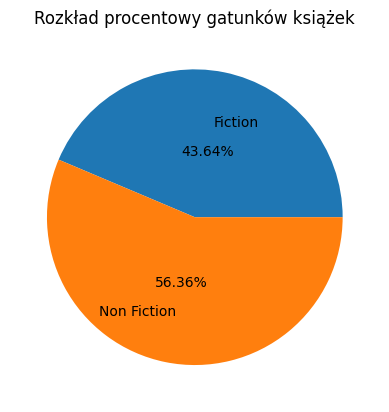

In [22]:
count_books_grouped_by_genre = books.groupby("genre")["genre"].agg("count")
print(count_books_grouped_by_genre)

labels = count_books_grouped_by_genre.index
data = count_books_grouped_by_genre.values

plt.pie(
    data,
    labels=labels,
    autopct="%.2f%%",
    pctdistance=0.45,
    labeldistance=0.65,
)
plt.title("Rozkład procentowy gatunków książek")
plt.show()


year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: price, dtype: float64


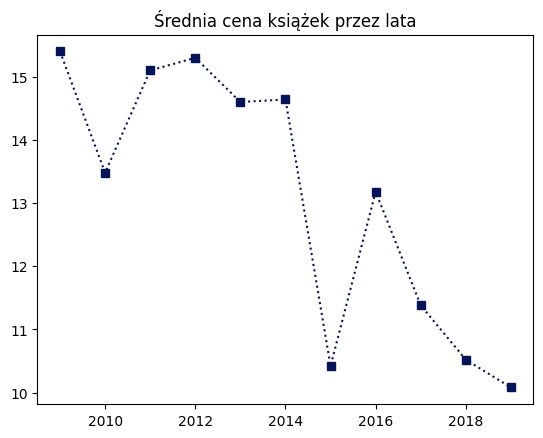

In [23]:
mean_books_grouped_by_years = books.groupby("year")["price"].agg("mean")
print(mean_books_grouped_by_years)

labels = mean_books_grouped_by_years.index
data = mean_books_grouped_by_years.values
plt.plot(
    labels,
    data,
    linestyle=":",
    color="#061358",
    marker="s"
)

plt.title("Średnia cena książek przez lata")
plt.show()

      min   mean  max
year                 
2009  4.0  4.584  4.8
2010  4.0  4.558  4.8
2011  4.0  4.558  4.9
2012  3.3  4.532  4.9
2013  3.8  4.554  4.9
2014  3.9  4.622  4.9
2015  3.6  4.648  4.9
2016  4.0  4.678  4.9
2017  4.0  4.660  4.9
2018  4.2  4.668  4.9
2019  4.3  4.740  4.9


[Text(0.5, 1.0, 'Statystyki ocen w ciągu lat')]

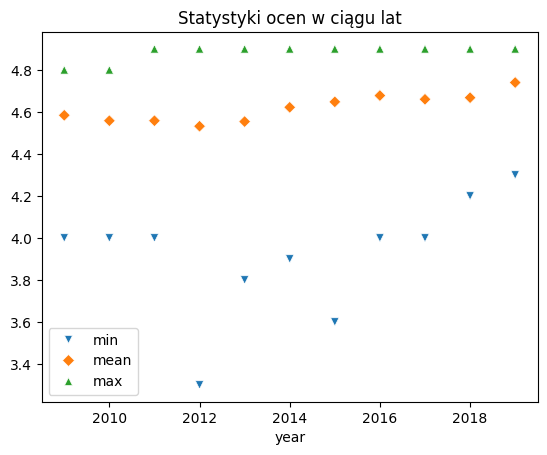

In [24]:
stats_user_rating_books_grouped_by_years = books.groupby("year")["user_rating"].agg(["min", "mean", "max"])
print(stats_user_rating_books_grouped_by_years)
sns.scatterplot(data=stats_user_rating_books_grouped_by_years, markers="vD^").set(title="Statystyki ocen w ciągu lat")

